**EMOTION DETECTION**

RAM KUMAR PORANDLA [*EE18B028*]

PRAKASH REDDY PASHAM [*EE18B026*]











In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### importing all the necessary libraries here #### 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import *


from sklearn.metrics import confusion_matrix, classification_report


from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'



In [ ]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/train.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/test.csv')

X = df.iloc[:, 1].values
y = df.iloc[:, 0].values
X_test1 = dataset2.iloc[:, 0].values


a1 = []
for i in range(len(X)):
    p = X[i].split(" ")
    p = list(map(int,p))
    a1.append(np.array(p))
a2 = []
for i in range(len(X_test1)):
    p = X_test1[i].split(" ")
    p = list(map(int,p))
    a2.append(np.array(p))
    
X = np.array(a1);X_test1 = np.array(a2)


In [ ]:
label_map={0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

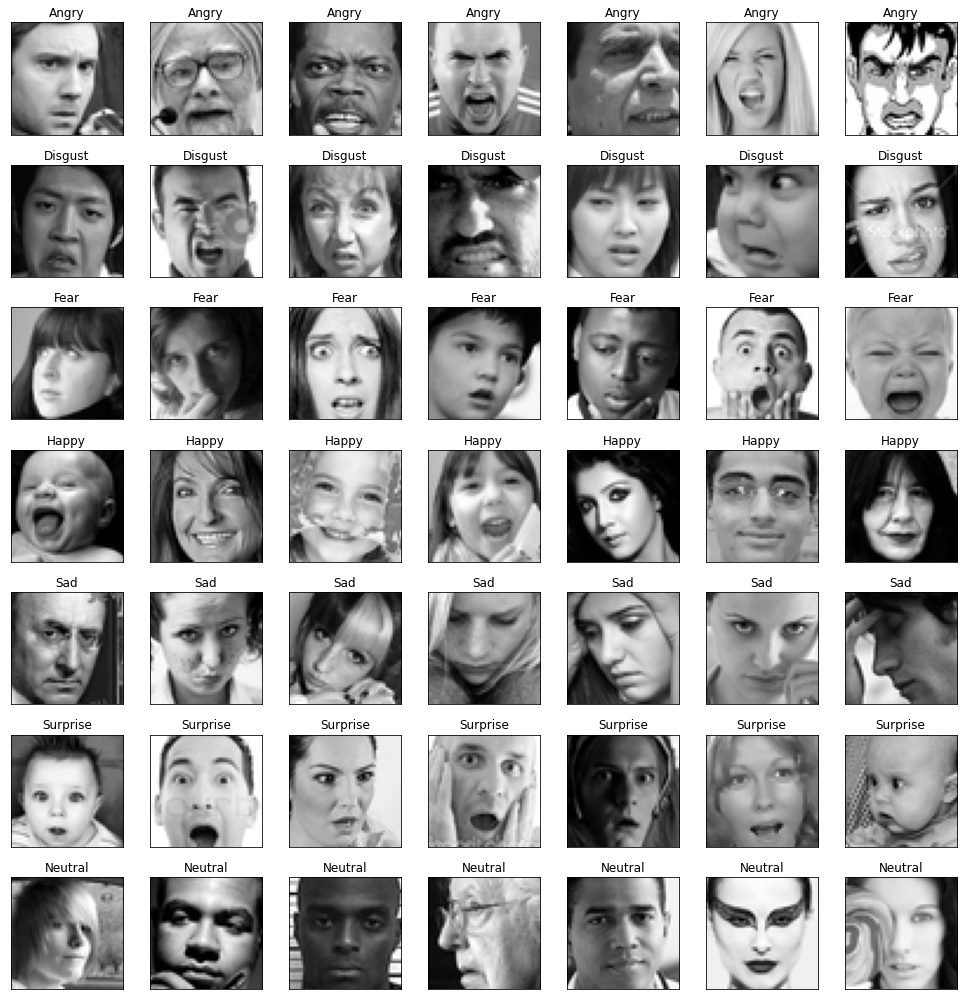

In [ ]:
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_map[label])
        plt.tight_layout()

In [ ]:
# # Feature Scaling
X = X / 255;
X_test1 / 255;

X = X.reshape(X.shape[0], 48, 48, 1)
X_test1 = X_test1.reshape(X_test1.shape[0], 48, 48, 1)



In [ ]:
# # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_ = train_test_split(X, y, test_size = 0.1, random_state = 42)

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train)


In [ ]:
cnn = Sequential()

cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same', input_shape = (48, 48, 1)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D((2, 2)))
cnn.add(Dropout(0.3))

  
cnn.add(Conv2D(128, kernel_size=(3  , 3), activation='relu', padding='same'))
cnn.add(BatchNormalization())
#cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
#cnn.add(BatchNormalization())
cnn.add(MaxPool2D((2,2)))
cnn.add(Dropout(0.2))

 
cnn.add(Conv2D(256, kernel_size=(3  , 3), activation='relu', padding='same'))
#cnn.add(BatchNormalization())
#cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D((2, 2)))


cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(BatchNormalization()) 
cnn.add(Dense(128, activation='relu'))

cnn.add(Dense(7, activation='softmax'))
cnn.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
batch_normalization_8 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_9 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 128)      

In [ ]:

cnn.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001), metrics=['accuracy'])
#histroy = cnn.fit(X_train, y_train, epochs = 50, validation_data =(X_test, y_test))

histroy = cnn.fit_generator(train_datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_val, y_val),steps_per_epoch=len(X_train) / 32,epochs=55)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/55
807/807 [==============================] - 16s 19ms/step - loss: 1.8588 - accuracy: 0.2443 - val_loss: 1.8378 - val_accuracy: 0.2407
Epoch 2/55
807/807 [==============================] - 16s 19ms/step - loss: 1.7064 - accuracy: 0.3127 - val_loss: 1.7601 - val_accuracy: 0.3086
Epoch 3/55
807/807 [==============================] - 15s 19ms/step - loss: 1.5720 - accuracy: 0.3874 - val_loss: 1.3217 - val_accuracy: 0.4789
Epoch 4/55
807/807 [==============================] - 15s 18ms/step - loss: 1.4116 - accuracy: 0.4551 - val_loss: 8.5382 - val_accuracy: 0.1526
Epoch 5/55
807/807 [==============================] - 15s 19ms/step - loss: 1.4447 - accuracy: 0.4356 - val_loss: 1.2148 - val_accuracy: 0.5420
Epoch 6/55
807/807 [==============================] - 15s 18ms/step - loss: 1.3084 - accuracy: 0.4962 - val_loss: 1.2405 - val_accuracy: 0.5246
Epoch 7/55
807/807 [==============================] - 15s 18ms/step - loss: 1.2628 - accuracy: 0.5140 - val_loss: 1.2317 - val_accuracy:

In [ ]:

histroy1 = cnn.fit_generator(train_datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_test, y_test),steps_per_epoch=len(X_train) / 32,epochs=25)

Epoch 1/25
  3/807 [..............................] - ETA: 20s - loss: 0.7146 - accuracy: 0.7708

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


807/807 [==============================] - 15s 19ms/step - loss: 0.7371 - accuracy: 0.7247 - val_loss: 1.0408 - val_accuracy: 0.6614
Epoch 2/25
807/807 [==============================] - 15s 19ms/step - loss: 0.7287 - accuracy: 0.7278 - val_loss: 1.0731 - val_accuracy: 0.6472
Epoch 3/25
807/807 [==============================] - 15s 19ms/step - loss: 0.7240 - accuracy: 0.7274 - val_loss: 1.0453 - val_accuracy: 0.6667
Epoch 4/25
807/807 [==============================] - 15s 19ms/step - loss: 0.7215 - accuracy: 0.7311 - val_loss: 1.0207 - val_accuracy: 0.6705
Epoch 5/25
807/807 [==============================] - 15s 19ms/step - loss: 0.7260 - accuracy: 0.7276 - val_loss: 1.0591 - val_accuracy: 0.6618
Epoch 6/25
807/807 [==============================] - 15s 19ms/step - loss: 0.7252 - accuracy: 0.7294 - val_loss: 1.0559 - val_accuracy: 0.6614
Epoch 7/25
807/807 [==============================] - 15s 19ms/step - loss: 0.7180 - accuracy: 0.7318 - val_loss: 1.0764 - val_accuracy: 0.6695
Epo

**Face Recognition** 

In [ ]:
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

In [ ]:
#dataset
data=np.load("/content/drive/MyDrive/olivetti_faces.npy")
target=np.load("/content/drive/MyDrive/olivetti_faces_target.npy")

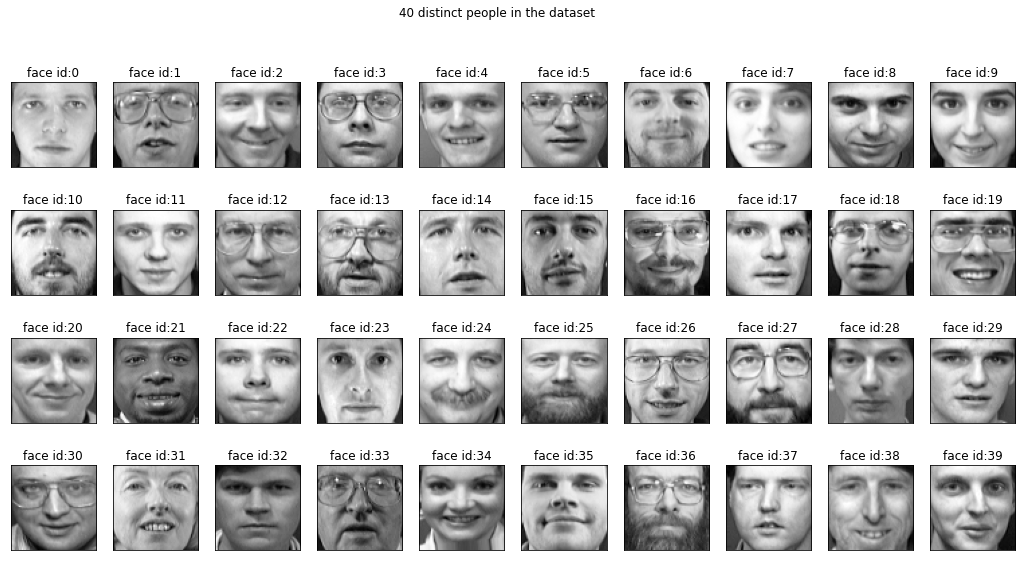

In [ ]:
#visilizing the dataset
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("40 distinct people in the dataset")
    
# visulization of faces (40)    
show_40_distinct_people(data, np.unique(target))


In [ ]:


#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)


X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))





X shape: (400, 4096)
X_train shape: (280, 4096)
y_train shape:(280,)


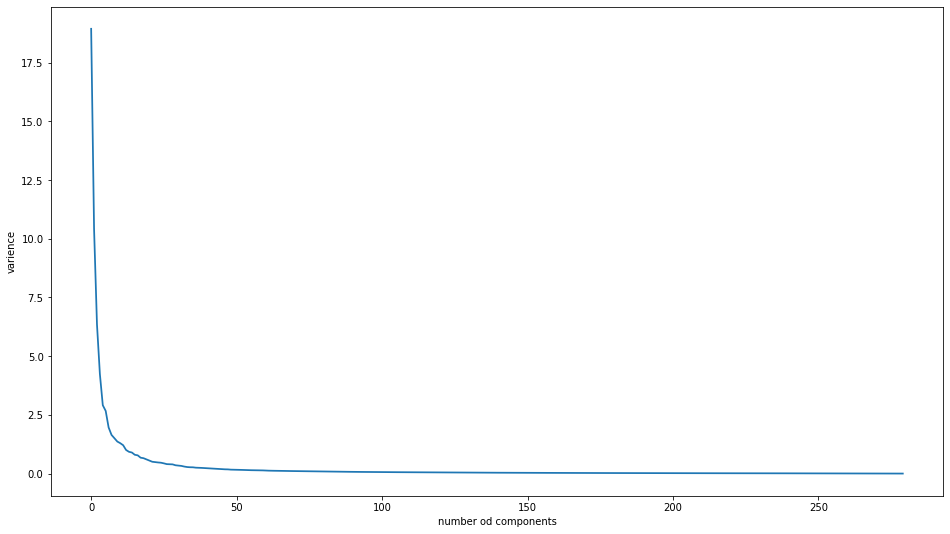

In [ ]:
#PRINCIPLE COMPONENT ANALYSIS
pca = PCA()
pca.fit(X_train)
plt.figure(figsize = (16,9))
plt.plot(pca.explained_variance_, linewidth=1.75)
plt.xlabel('number od components')
plt.ylabel('varience')
plt.show()
#since the varience at 90 components is close to zero ==> considering 90 pricniple components 

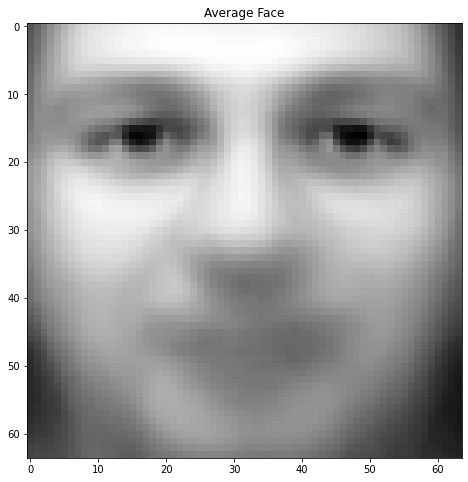

In [ ]:
n_components=90

pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)



fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_title('Average Face')

number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))


In [ ]:
cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):   
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))



In [ ]:

X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
print(X_train_pca.shape)

(280, 90)


In [ ]:
lr=LinearDiscriminantAnalysis()
lr.fit(X_train_pca, y_train)
y_pred=lr.predict(X_test_pca)
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy score:0.93


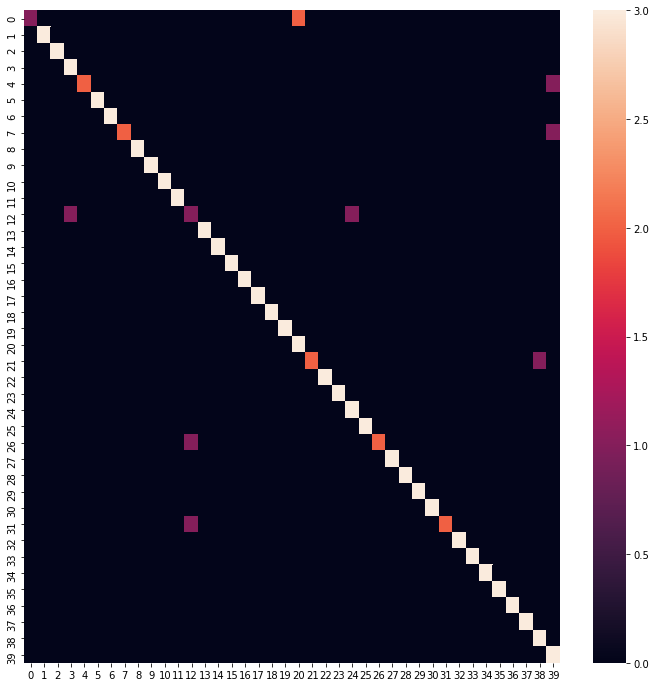

In [ ]:

cm=metrics.confusion_matrix(y_test, y_pred)
import seaborn as sns

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)


In [ ]:

#testing emotion detection and face recognition on a image 
img = data[395,:]
id = target[395]
plt.imshow(img, cmap = 'gray')

from skimage.transform import resize
plt.figure()
img_resize = resize(img, (48, 48))
plt.imshow(img_resize, cmap = 'gray')

img_resize.resize(1,48,48,1)


NameError: ignored

In [ ]:
x = list(cnn.predict_classes(img_resize))

y = x[0]
print(20*'=','>',end='')
print( label_map[y] ,end='')
print("<",20*'=')


img.resize(1, 4096)
img_pca = pca.transform(img)
img_pca.shape
pred = lr.predict(img_pca)
print(17*'=','> ID No ', pred,'<',15*'=' )

#
#the image belongs to id number of 39
#


==================== >Happy< ====================
================= > ID No  [39] < ===============


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
